In [1]:
!pip install xgboost  # For installing xgboost if not present

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing important functions/algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

In [3]:
# Change the path in first parameter becuase the notebook and excel file are both on same directory on my machine
df = pd.read_excel('./Patterns Project.xlsx', sheet_name='Original')  # ./  is for current directory and there is no need here for this but just for sake of understanding.Do change the path if file is somewhere else 

In [4]:
df.describe()  # The std(standard deviation) of some features is big which could cause a problem 

,Month,Date,EURKM vs Budget,EURKM vs Budget(abs),Plan Capacity,Plan Km,Plan Load,Plan Net Revenue per Bus Km,Plan Net Yield,Plan Pax Km,...,YIELD vs Budget,YIELD vs Budget (abs),Km,Km Total,Net Revenue Per Km,Net Revenue Per Seat Km,Net Yield,Seat Km,Utilization (%),Outcome
count,22831.000000,22831.000000,22421.000000,22421.000000,22441.000000,22831.000000,22441.000000,22441.000000,22423.000000,2.283100e+04,...,22421.000000,22421.000000,22831.000000,2.283100e+04,22831.000000,22831.000000,22831.000000,2.283100e+04,22831.000000,22831.000000
mean,6.747273,2018.194735,-0.001725,-0.048463,54.490245,51830.204809,0.565135,1.486628,4.745389,1.722844e+06,...,0.016235,-0.177123,49664.515377,1.642622e+06,1.425633,0.025686,4.524891,2.832515e+06,0.532803,0.295213
std,3.375115,0.787724,0.508887,0.485943,23.634161,37821.740364,0.117718,0.851328,1.284120,1.961437e+06,...,0.881198,1.296406,37756.517776,1.751325e+06,0.882839,0.011066,1.740832,2.770321e+06,0.181587,0.456148
min,1.000000,2017.000000,-1.000000,-9.667131,19.975494,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,-1.000000,-18.500173,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2018.000000,-0.155681,-0.228383,48.130141,30174.500000,0.500003,1.105292,4.137426,7.983725e+05,...,-0.085798,-0.412930,28560.270000,7.272003e+05,1.055965,0.020400,3.965144,1.432746e+06,0.472096,0.000000
50%,7.000000,2018.000000,-0.009038,-0.011545,49.012477,43916.000000,0.568541,1.381691,4.644370,1.320326e+06,...,0.003860,0.018346,43130.200000,1.289940e+06,1.385265,0.026201,4.639051,2.267225e+06,0.564207,0.000000
75%,10.000000,2019.000000,0.149559,0.192533,54.003739,63656.000000,0.641165,1.741116,5.252786,2.128926e+06,...,0.091472,0.412197,62702.000000,2.108328e+06,1.766882,0.031978,5.349114,3.524148e+06,0.646336,1.000000
max,12.000000,2019.000000,14.431777,4.741925,730.036259,427338.000000,0.961876,24.063893,27.221611,4.833879e+07,...,31.196276,4.883833,425402.800000,4.065796e+07,22.559918,0.090757,27.607777,5.244246e+07,0.964033,1.000000


In [5]:
df.info()  # Deal with the string/object column types.Object is basically string but machine learning algorithms don't understand strings so need to encode that

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22831 entries, 0 to 22830
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Line Code                    22831 non-null  object 
 1   Month                        22831 non-null  int64  
 2   Date                         22831 non-null  int64  
 3   EURKM vs Budget              22421 non-null  float64
 4   EURKM vs Budget(abs)         22421 non-null  float64
 5   Plan Capacity                22441 non-null  float64
 6   Plan  Km                     22831 non-null  int64  
 7   Plan Load                    22441 non-null  float64
 8   Plan Net Revenue per Bus Km  22441 non-null  float64
 9   Plan Net Yield               22423 non-null  float64
 10  Plan Pax Km                  22831 non-null  int64  
 11  Plan Seat Km                 22831 non-null  int64  
 12  SKM vs Budget                22441 non-null  float64
 13  SKM vs Budget(ab

In [6]:
df_2 = df.dropna() # Dealing with missing values
df_2['Line Code'] = df_2['Line Code'].astype(str)  # .astype(str) is because Line Code is an object they are strings but need to do it explicitly 

<ipython-input-6-fece3db35fee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Line Code'] = df_2['Line Code'].astype(str)  # .astype(str) is because Line Code is an object they are strings but need to do it explicitly


In [7]:
df_2['Line Code'] = LabelEncoder().fit_transform(df_2['Line Code'])  # Encoding Line Code as it contains alphabets too.I found LabelEncoder the best choice here

<ipython-input-7-895a87dff11c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Line Code'] = LabelEncoder().fit_transform(df_2['Line Code'])  # Encoding Line Code as it contains alphabets too.I found LabelEncoder the best choice here


In [8]:
# # The code in this cell is basically just converting time and year in datetime index but it was just a step which I found unimportant so thats why commented out

# df_2.drop(['Month', 'Date'], axis=1, inplace=True)

# df_2['Year_and_Month'] = df['Date'].astype('str') + '-' + df['Month'].astype('str')
# df_2['Year_and_Month'] = pd.to_datetime(df_2['Year_and_Month'])  # Converting Year_and_month col into datetime.As default day is 01 but right now it wouldn't make a problem
# df_2 = df_2.set_index('Year_and_Month')

# df_2['Year'] = df_2.index.year
# df_2['Month'] = df_2.index.month

df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22421 entries, 0 to 22830
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Line Code                    22421 non-null  int64  
 1   Month                        22421 non-null  int64  
 2   Date                         22421 non-null  int64  
 3   EURKM vs Budget              22421 non-null  float64
 4   EURKM vs Budget(abs)         22421 non-null  float64
 5   Plan Capacity                22421 non-null  float64
 6   Plan  Km                     22421 non-null  int64  
 7   Plan Load                    22421 non-null  float64
 8   Plan Net Revenue per Bus Km  22421 non-null  float64
 9   Plan Net Yield               22421 non-null  float64
 10  Plan Pax Km                  22421 non-null  int64  
 11  Plan Seat Km                 22421 non-null  int64  
 12  SKM vs Budget                22421 non-null  float64
 13  SKM vs Budget(ab

In [9]:
# Defining our features
features = df_2.drop('Outcome', axis=1)  

# Defining our labels
labels = df_2['Outcome']

# Scaling features
scaler = StandardScaler()  
scaled_features = scaler.fit_transform(features)  

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.1, stratify=labels)

In [10]:
rf = RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
rf.fit(X_train, y_train)

print( accuracy_score(y_test, rf.predict(X_test)) )

0.8849754792688364


In [11]:
# # Printing the bar plot of random forest only

# columns = [col  for col in df_2.columns  if col != 'Outcome' and col != 'Line Code']
# print(len(columns))
# plt.bar(range(X_train.shape[1] - 1), rf.feature_importances_[1:])
# plt.xticks(range(X_train.shape[1] - 1), columns, fontsize=30, rotation=90)
# plt.yticks(fontsize=30)
# fig = plt.gcf()  # get current figure
# fig.set_size_inches(30,30)

In [12]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print( accuracy_score(y_test, xgb.predict(X_test)) )

0.96121266161391


In [13]:
# # Printing the bar plot of xgboost only

# plt.bar(range(X_train.shape[1]), xgb.feature_importances_)
# plt.xticks(range(X_train.shape[1]), columns, fontsize=30, rotation=90)
# plt.yticks(fontsize=30)
# fig = plt.gcf()  # get current figure
# fig.set_size_inches(30,30)

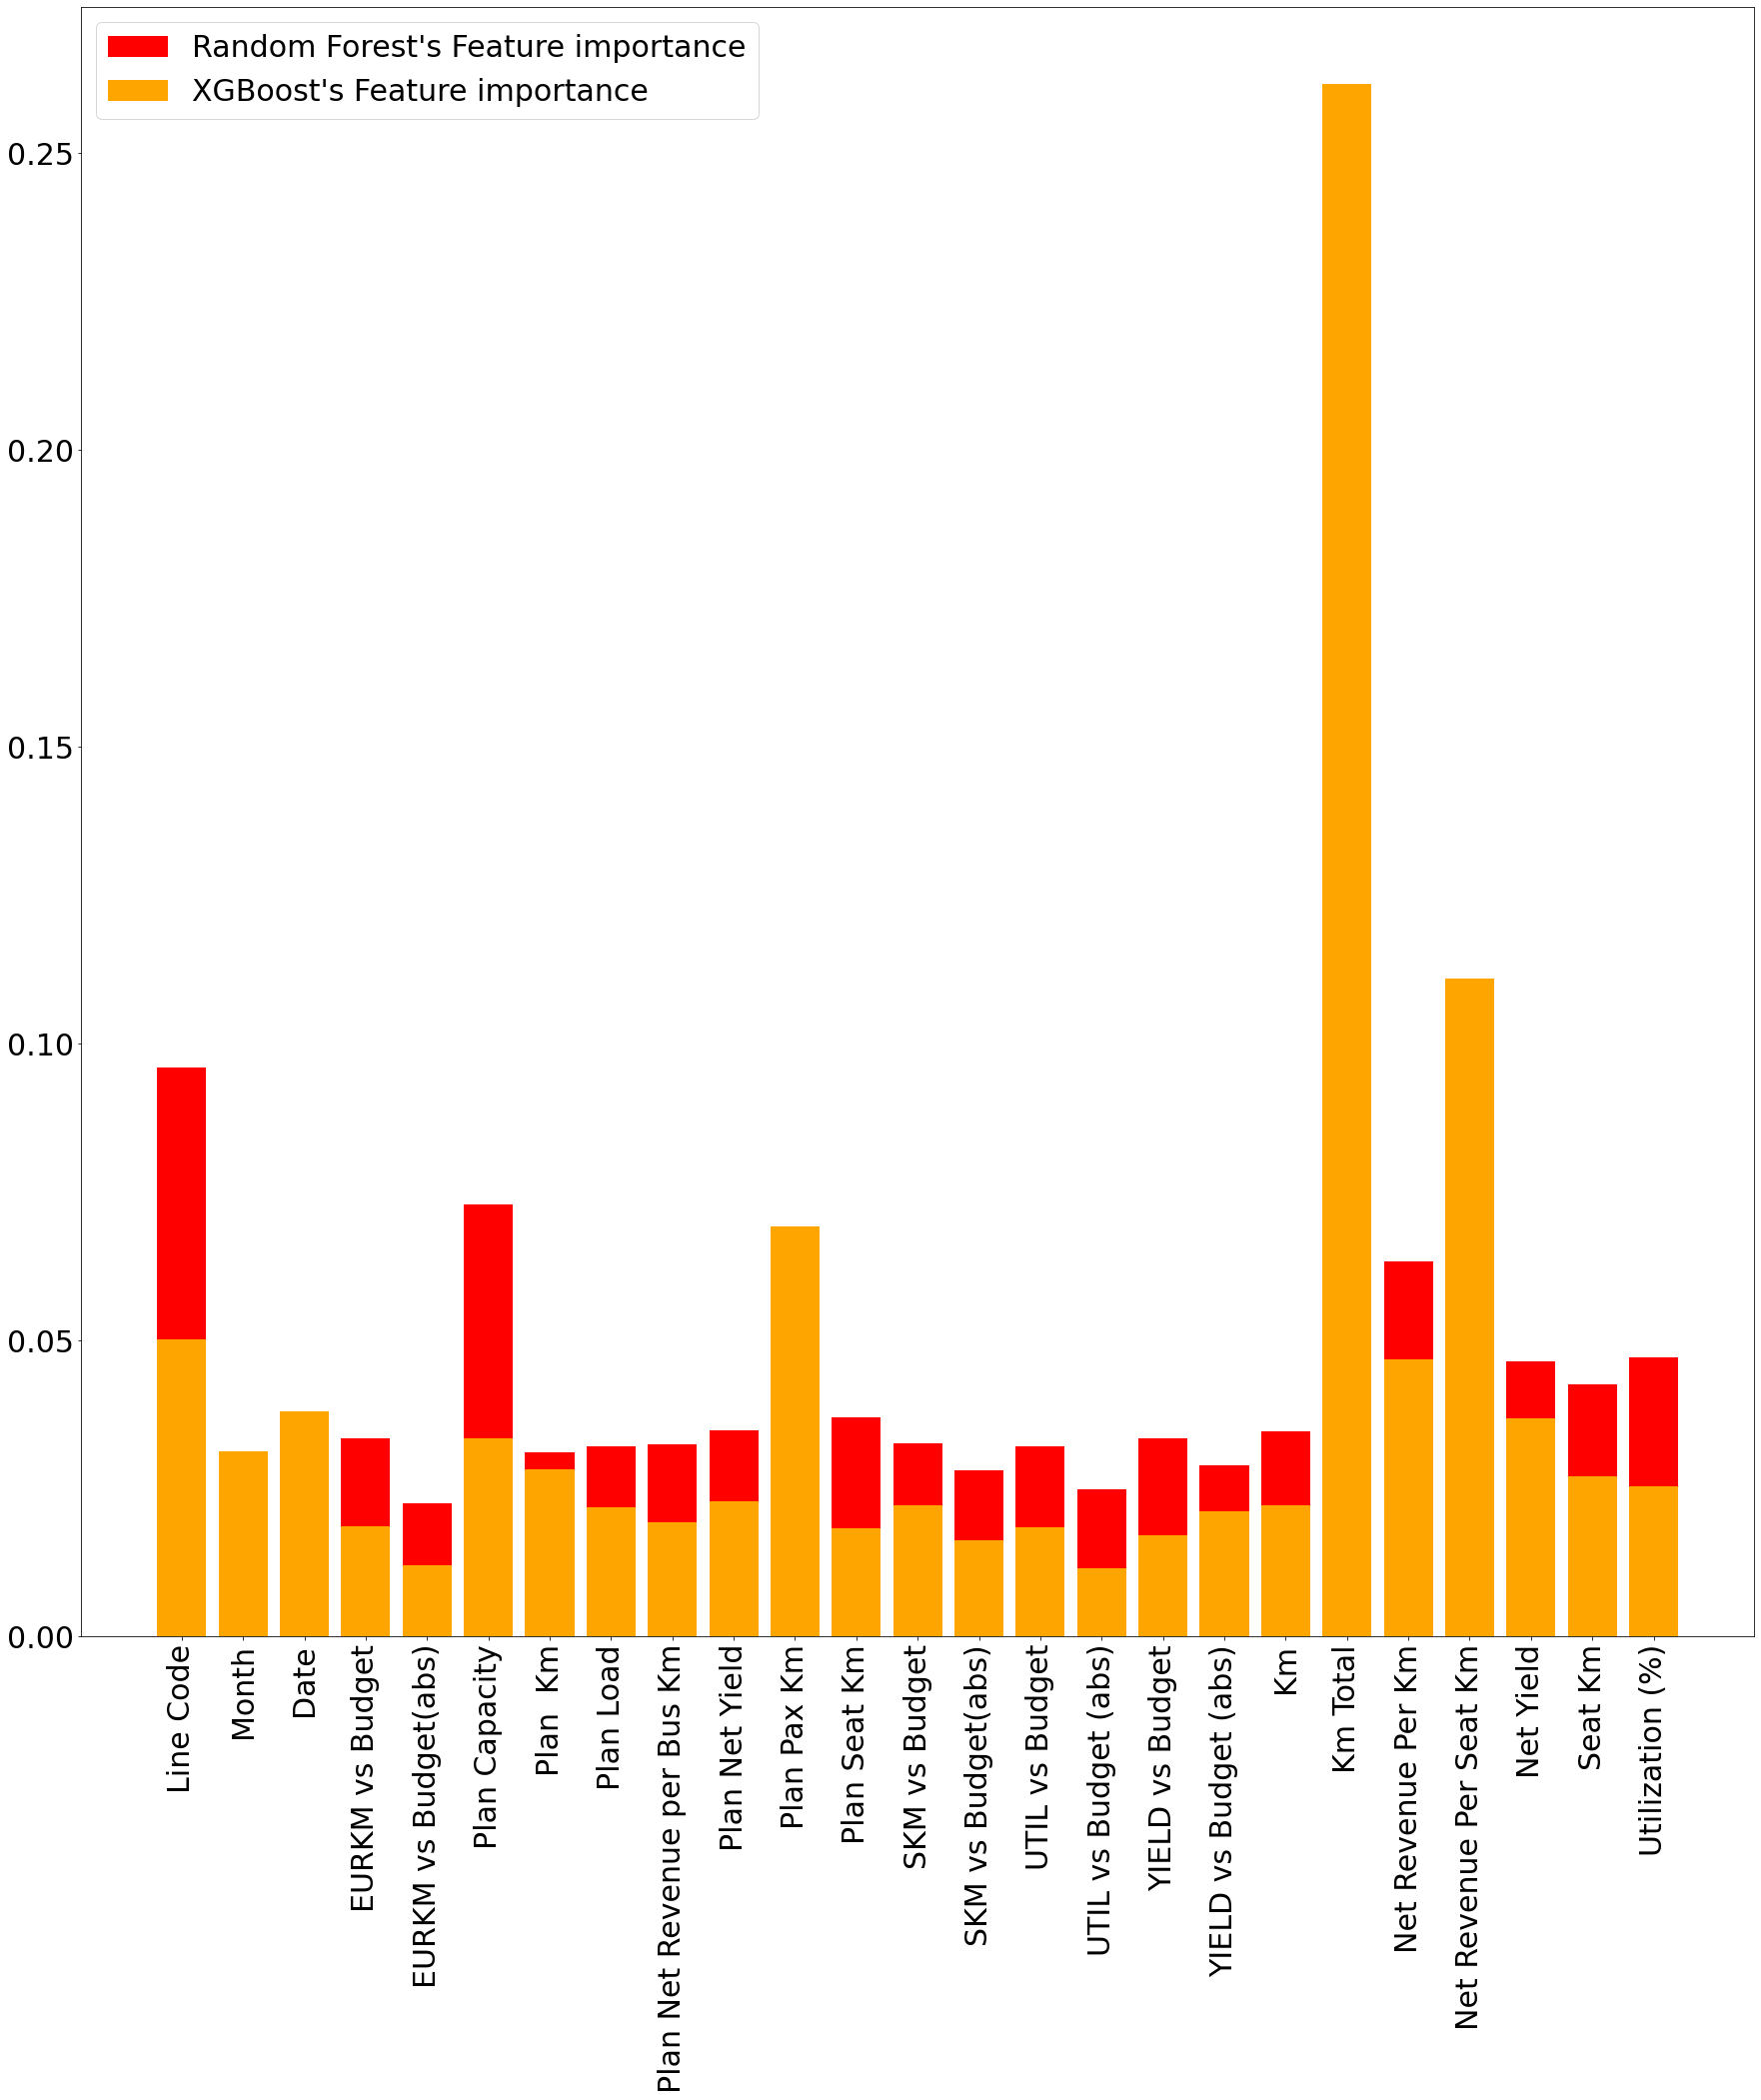

In [14]:
# Comparing features important by both models through plotting them on same graph

columns = [col  for col in df_2.columns  if col != 'Outcome'] # Because X_train or training set/features have only features not the target variable

plt.bar(range(X_train.shape[1]), rf.feature_importances_, color='red', label="Random Forest's Feature importance")
plt.bar(range(X_train.shape[1]), xgb.feature_importances_, color='orange', label="XGBoost's Feature importance")

plt.legend(fontsize=30)
plt.xticks(range(X_train.shape[1]), columns, fontsize=30, rotation=90)  # Fixing the x axis and replacing the values with column names and rotating names 90 degree
plt.yticks(fontsize=30)
fig = plt.gcf()  # get current figure
fig.set_size_inches(30,30)

# plt.savefig('feature-importance-comparison.png')

In [15]:
print( classification_report(y_test, rf.predict(X_test)) )  # This shows the better insight into performance of model
# You can see that recall for predicting 1 is low compared to recall for 0 so that tells us that the model is not that much good

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1598
           1       0.89      0.68      0.77       645

    accuracy                           0.88      2243
   macro avg       0.89      0.82      0.85      2243
weighted avg       0.89      0.88      0.88      2243



In [16]:
print( classification_report(y_test, xgb.predict(X_test)) )  # This shows xGBoost's performance is good
# Overall you can see that there is not that much difference between any two values so thats why going forward with xgboost is good choice

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1598
           1       0.96      0.90      0.93       645

    accuracy                           0.96      2243
   macro avg       0.96      0.94      0.95      2243
weighted avg       0.96      0.96      0.96      2243



In [17]:
kf = KFold(n_splits=30)  # Split dataset into k consecutive folds (without shuffling by default).Each fold is then used once as a validation whil

random_forest = RandomForestClassifier()
xtreme_gb = XGBClassifier()

# Cross validating to gain better performance idea 
rf_score = cross_val_score(random_forest, X_train, y_train, cv=kf)  
xgb_score = cross_val_score(xtreme_gb, X_train ,y_train, cv=kf)

print("Random Forest:", np.mean(rf_score), "Xtreme Gradient Boosting:", np.mean(xgb_score))  
# By cross validating on different subsets after taking mean on scoers by each model we can see that xgb is still good while random forest's score decreased little

Random Forest: 0.893794296445671 Xtreme Gradient Boosting: 0.959709618741008


In [18]:
# Highlighting  probabilities after 3 months

#np.set_printoptions(suppress=True)  # When you print probs after next line then the data may appear in scientific notation so this line is used to represent in decimal form

# Predicting on scaled data i.e preprocessed data
probs = xgb.predict_proba(scaled_features)    # 2d shape of resulting array and first element and in each row first element would be probability of it being 0 and second element would be probability of being failed line(1)

prob_after_months = [] # For Probability of being a failure line after 3 months
mask = []   # We are creating a mask of booleans and then applying to original data so wherever there would be True it will take that row and where there will be False it will not take that row
for i in range( df_2.shape[0] ):    # Iterating over rows
    if i+3 >= df_2.shape[0]:    # If row after three months for last line code's third last row is not present
        prob_after_months.extend([None, None, None]) # To make it equal in length to original data thats why adding [None,..] to prob array
        mask.extend([False, False, False])    # To make it equal in length to original data thats why adding this boolean array to mask array
        break    # We have reached the end so break iteration
        
    current_line_code = df_2.iloc[i]['Line Code']     # Line Code of current row
    next_3_months_line_code = df_2.iloc[i+3]['Line Code']    # Line Code of row after three months or after three rows

    if next_3_months_line_code == current_line_code:    # If the entry after three steps belongs to the same line code i.e data after next three months
        if probs[i+3, 1] >= 0.70:     # Probability being greater or equal to 70%
            mask.append(True)        # Adding True to mask array because we need to keep this row
        else:
            mask.append(False)   # Adding False to mask array because this row does not meet requirement
        prob_after_months.append(probs[i+3, 1])  # Adding Probability of becoming failed line after 3 months
    else:
        # If entry after month belongs to different line code and not the next three months of current line code so still we need to not take this row in account
        prob_after_months.append(None)  
        mask.append(False)      

In [19]:
df_3 = df.dropna()
print(len(mask) == df_3.shape[0])
print(len(prob_after_months) == df_3.shape[0])

True
True


In [20]:
failed_line_in_3_months = df_3[mask]  # Applying mask to original data for filtering out rows which meets our requirements

In [21]:
failed_line_in_3_months.head()

,Line Code,Month,Date,EURKM vs Budget,EURKM vs Budget(abs),Plan Capacity,Plan Km,Plan Load,Plan Net Revenue per Bus Km,Plan Net Yield,...,YIELD vs Budget,YIELD vs Budget (abs),Km,Km Total,Net Revenue Per Km,Net Revenue Per Seat Km,Net Yield,Seat Km,Utilization (%),Outcome
60,5,1,2017,0.017129,0.020989,52.492927,43968,0.579058,1.225323,4.031142,...,0.066267,0.267130,43962.1,1274709.4,1.246312,0.025934,4.298272,2112671.0,0.603364,1
61,5,2,2017,-0.094778,-0.104072,52.492740,34712,0.586531,1.098064,3.566459,...,0.102760,0.366489,34707.2,877171.0,0.993992,0.020712,3.932948,1665626.4,0.526631,1
62,5,3,2017,-0.007904,-0.008972,52.497787,45859,0.579802,1.135044,3.729001,...,0.064635,0.241023,45857.0,1300705.6,1.126073,0.023621,3.970024,2186157.3,0.594973,1
63,5,4,2017,-0.040072,-0.055151,52.498404,16290,0.636999,1.376304,4.115566,...,0.161390,0.664212,16382.6,452822.9,1.321154,0.025739,4.779778,840911.3,0.538491,1
64,5,5,2017,0.001386,0.001733,52.500000,12488,0.607602,1.250721,3.920865,...,0.324611,1.272758,12866.0,310266.5,1.252454,0.023631,5.193622,681898.0,0.455004,1


In [22]:
failed_line_in_3_months.shape # Checking how many rows met the requirement

(4742, 26)

In [23]:
# # In this cell we are seeing that how many failed lines did not meet the requirements

# failed_lines = df_3[df_3['Outcome'] == 1]

# print(failed_lines.shape[0] - failed_line_in_3_months.shape[0])  

In [24]:
failed_line_in_3_months.to_excel('./failed-lines-in-3-months.xlsx', index=False)  # ./ is for saving in current directory index=False is for not saving index or row number as a separate column 

In [25]:
df_3['Probability of Failure(after 3 months)'] = prob_after_months

<ipython-input-25-1102904b9748>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Probability of Failure(after 3 months)'] = prob_after_months


In [26]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22421 entries, 0 to 22830
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Line Code                               22421 non-null  object 
 1   Month                                   22421 non-null  int64  
 2   Date                                    22421 non-null  int64  
 3   EURKM vs Budget                         22421 non-null  float64
 4   EURKM vs Budget(abs)                    22421 non-null  float64
 5   Plan Capacity                           22421 non-null  float64
 6   Plan  Km                                22421 non-null  int64  
 7   Plan Load                               22421 non-null  float64
 8   Plan Net Revenue per Bus Km             22421 non-null  float64
 9   Plan Net Yield                          22421 non-null  float64
 10  Plan Pax Km                             22421 non-null  in

In [27]:
df_3.head()

,Line Code,Month,Date,EURKM vs Budget,EURKM vs Budget(abs),Plan Capacity,Plan Km,Plan Load,Plan Net Revenue per Bus Km,Plan Net Yield,...,YIELD vs Budget (abs),Km,Km Total,Net Revenue Per Km,Net Revenue Per Seat Km,Net Yield,Seat Km,Utilization (%),Outcome,Probability of Failure(after 3 months)
0,1,1,2017,0.023122,0.033176,53.000862,114857,0.583000,1.434802,4.643446,...,0.095164,114858.9,3558222.1,1.467977,0.029198,4.738610,5774745.2,0.616170,0,0.000634
1,1,2,2017,-0.132650,-0.211710,50.001359,103028,0.700649,1.596003,4.555663,...,-0.214174,103030.8,3285158.4,1.384293,0.027453,4.341488,5195309.6,0.632332,0,0.000508
2,1,3,2017,0.163055,0.229740,51.001362,113816,0.638601,1.408976,4.326056,...,0.279776,113819.1,4049587.4,1.638716,0.032499,4.605832,5739253.6,0.705595,0,0.000518
3,1,4,2017,0.169769,0.278225,50.998759,124902,0.686000,1.638845,4.684405,...,0.684334,124898.9,4459891.7,1.917070,0.038194,5.368739,6269035.2,0.711416,0,0.001000
4,1,5,2017,0.056917,0.085502,51.999176,137066,0.627200,1.502218,4.606067,...,0.505796,137063.9,4257137.2,1.587720,0.031693,5.111863,6866404.7,0.619995,0,0.000915


In [28]:
df_3.to_excel('./original-data-with-probs.xlsx', index=False) 

In [29]:
xtreme_gb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
dummy = np.array([[-0.69708394,  0.0852767 ,  1.00745052,  0.30569428,  0.46520926,
                    -0.31715014,  0.24372845, -0.2117296 , -0.39210425, -0.15903603,
                     0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
                     0.7579883 , -0.0706823 , -0.02469647,  0.31020082,  0.13747536]])
xtreme_gb.predict(dummy)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19']
expected f21, f24, f23, f20, f22 in input data

In [31]:
print("{}, {}, {}".format(4, 5, 6))

4, 5, 6


In [ ]:
X_test[0].reshape?

In [ ]:
X_test[0].reshape

In [ ]:
xgb